## Import packages

In [2]:
import qiskit.tools.jupyter
%qiskit_version_table

In [1]:
! pip install matplotlib

## Pauli decomposition

In [2]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np

# Good example
A = np.array([[5,5],[5,-1]])

# Bad example using all the 4^n basis
A = np.random.rand(32,32)
print(A)

pauli_op = SparsePauliOp.from_operator(A)  # A is your matrix from above
print(np.size(pauli_op))

[[0.57427896 0.76491767 0.91980171 ... 0.80980059 0.49805986 0.03225489]
 [0.61694291 0.03098339 0.33403591 ... 0.87041917 0.07000109 0.07348866]
 [0.61691717 0.2831951  0.4141079  ... 0.41321279 0.22175807 0.68127777]
 ...
 [0.89558728 0.31875612 0.96566147 ... 0.69677566 0.37001994 0.14662826]
 [0.76972957 0.82359192 0.85728172 ... 0.92672987 0.56474724 0.62806343]
 [0.3950533  0.31989257 0.55880433 ... 0.77200508 0.11124832 0.16628521]]
1024


## Expectation Value

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp

# Step 1: Define operator
op = SparsePauliOp.from_list(
    [
        ("Z", 1)
    ]
)

# Step 2: Define quantum state
state = QuantumCircuit(1)
state.h(0)
# state.x(1)

In [6]:
from qiskit.primitives import Estimator
import numpy as np

estimator = Estimator()
A=np.array([[1,0],[0,-1]])
a=np.array([1,1])

pauli_op = SparsePauliOp.from_operator(A)

#expectation_value = estimator.run(a, A).result().values

# for shot-based simulation:
expectation_value = estimator.run(state, op, shots=10000000000).result().values
print("expectation: ", expectation_value)


expectation:  [-2.22417833e-05]


## Hello World: Bell states

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Use Aer's AerSimulator
simulator = AerSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=100000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'00': 49936, '11': 50064}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

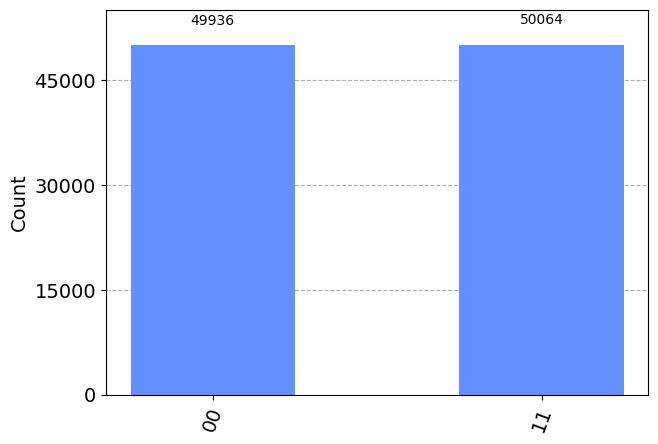

In [5]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [6]:

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qreg_q = QuantumRegister(2, "q")

# Encoding circuit to create the logical basis states
bell_circuit = QuantumCircuit(qreg_q)
bell_circuit.h(qreg_q[0])
bell_circuit.cx(qreg_q[0], qreg_q[1])
bell_circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [7]:
from qiskit.quantum_info import Statevector

# Returns the output statevector of the given circuit
statevec = Statevector.from_instruction(bell_circuit.reverse_bits())
statevec.draw(output = 'latex')

<IPython.core.display.Latex object>

## Toffoli gate

As an example of gate synthesis.

In [8]:
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

In [9]:
newcirc = QuantumCircuit(3)
newcirc.h(0) #performs hadamard gate using ".h" on qubit 0, resulting in a superposition between 0 and 1 state
newcirc.h(1)
newcirc.toffoli(0,1,2) # perform CNOT gate on qubit 0 and 1, with qubit 0 being the control and qubit 1 being the qubit that receives the flip operation
newcirc.s(2)
newcirc.toffoli(0,1,2) # CNOT gate but control gate being qbit 0 and target being qbit 2
newcirc.h(0)
newcirc.h(1)
newcirc.draw()


┌───┐               ┌───┐
q_0: ┤ H ├──■─────────■──┤ H ├
     ├───┤  │         │  ├───┤
q_1: ┤ H ├──■─────────■──┤ H ├
     └───┘┌─┴─┐┌───┐┌─┴─┐└───┘
q_2: ─────┤ X ├┤ S ├┤ X ├─────
          └───┘└───┘└───┘

In [10]:
from qiskit.quantum_info import Statevector

# Returns the output statevector of the given circuit
statevec = Statevector.from_instruction(newcirc.reverse_bits())
statevec.draw(output = 'latex')

<IPython.core.display.Latex object>

In [12]:
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u1', 'u2', 'u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(newcirc)
new_circ.draw()

┌─────────┐                                                       »
q_0: ┤ U2(0,π) ├───────────────────■────────────────────────────────■──»
     ├─────────┤                   │                  ┌─────────┐   │  »
q_1: ┤ U2(0,π) ├──■────────────────┼───────────────■──┤ U1(π/4) ├───┼──»
     ├─────────┤┌─┴─┐┌──────────┐┌─┴─┐┌─────────┐┌─┴─┐├─────────┴┐┌─┴─┐»
q_2: ┤ U2(0,π) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U1(π/4) ├┤ X ├┤ U1(-π/4) ├┤ X ├»
     └─────────┘└───┘└──────────┘└───┘└─────────┘└───┘└──────────┘└───┘»
«                ┌─────────┐                                             »
«q_0: ─────■─────┤ U1(π/4) ├──────■───────────────────────────────────■──»
«        ┌─┴─┐   ├─────────┴┐   ┌─┴─┐                                 │  »
«q_1: ───┤ X ├───┤ U1(-π/4) ├───┤ X ├────────────────■────────────────┼──»
«     ┌──┴───┴──┐├─────────┬┘┌──┴───┴──┐┌─────────┐┌─┴─┐┌──────────┐┌─┴─┐»
«q_2: ┤ U1(π/4) ├┤ U2(0,π) ├─┤ U1(π/2) ├┤ U2(0,π) ├┤ X ├┤ U1(-π/4) ├┤ X ├»
«     └─────────┘└─────────┘ └─────────┘└─────────┘└───┘└──────────┘└───┘»
«                                                 ┌─────────┐      ┌─────────┐
«q_0: ──────────────────────────────■───────■─────┤ U1(π/4) ├───■──┤ U2(0,π) ├
«                     ┌─────────┐   │     ┌─┴─┐   ├─────────┴┐┌─┴─┐├─────────┤
«q_1: ─────────────■──┤ U1(π/4) ├───┼─────┤ X ├───┤ U1(-π/4) ├┤ X ├┤ U2(0,π) ├
«     ┌─────────┐┌─┴─┐├─────────┴┐┌─┴─┐┌──┴───┴──┐├─────────┬┘└───┘└─────────┘
«q_2: ┤ U1(π/4) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U1(π/4) ├┤ U2(0,π) ├─────────────────
«     └─────────┘└───┘└──────────┘└───┘└─────────┘└─────────┘

### quantum fourier transform


In [13]:
from qiskit.circuit.library import QFT
from qiskit import Aer
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import warnings
warnings.filterwarnings('ignore')

Computational basis |000>


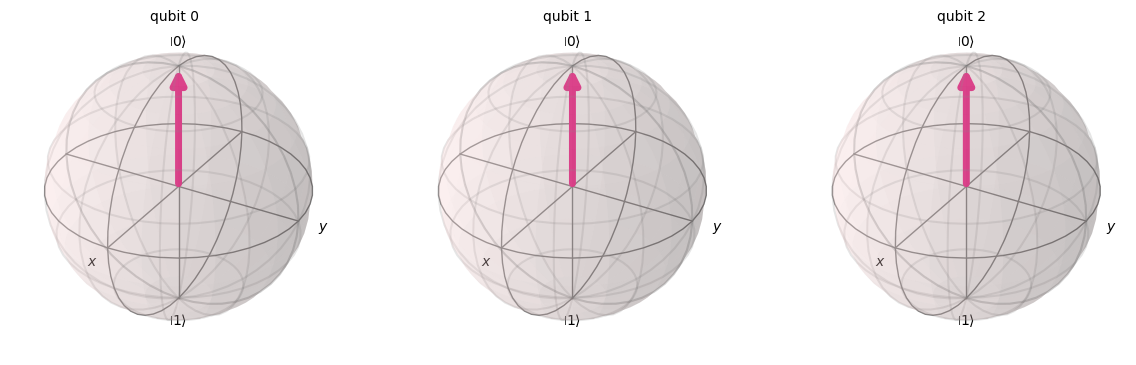

Fourier basis |000>


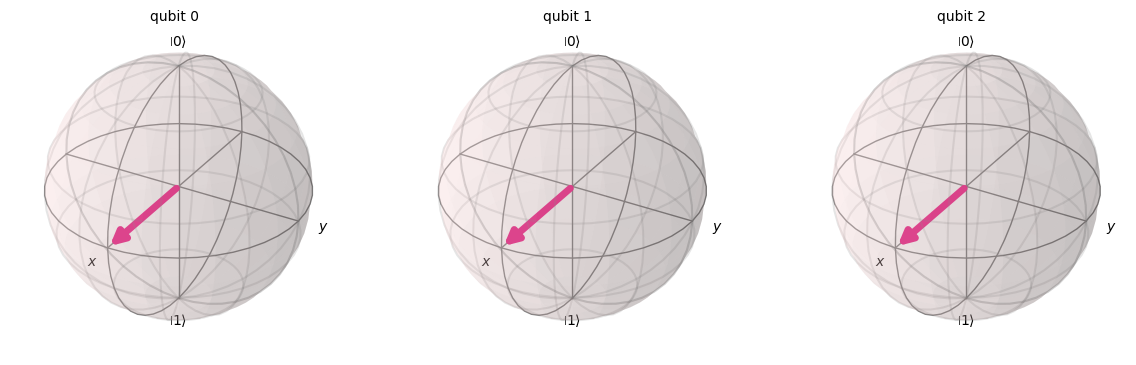

<IPython.core.display.Latex object>

In [14]:
state = '000'
qftcircuit = QuantumCircuit(len(state))
qftcircuit.initialize(Statevector.from_label(state).data, qftcircuit.qubits[::-1])
print(f'Computational basis |{state}>')
display(plot_bloch_multivector(Statevector.from_instruction(qftcircuit).data))
print(f"Fourier basis |{state}>")
qftcircuit.append(QFT(len(state), do_swaps=True), qftcircuit.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(qftcircuit).data))

from qiskit.quantum_info import Statevector

# Returns the output statevector of the given circuit
statevec = Statevector.from_instruction(qftcircuit.reverse_bits())
statevec.draw(output = 'latex')

Goal 1: circuit basics - building a circuit - GHZ as an example

In [15]:
import numpy as np
from qiskit import QuantumCircuit

# Create a Quantum Circuit acting on a quantum register of 3 qubits
newcirc = QuantumCircuit(3)
# below is attempt to build a GHZ gate. (hadamard gate on qubit 0, CNOT gate between qubit 0 and qubit 1, CNOT gate between qubit 0 and qubit 2)
newcirc.h(0) #performs hadamard gate using ".h" on qubit 0, resulting in a superposition between 0 and 1 state
newcirc.cx(0,1) # perform CNOT gate on qubit 0 and 1, with qubit 0 being the control and qubit 1 being the qubit that receives the flip operation
newcirc.cx(0,2) # CNOT gate but control gate being qbit 0 and target being qbit 2

In [16]:

# visualize the circuit using the qiskit function QuantumCircuit.draw()
newcirc.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

Goal 1: Simulating circuits (Circuit Basics)


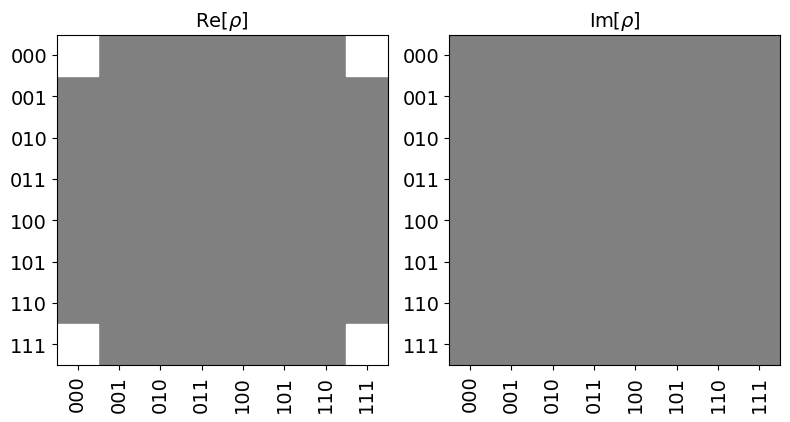

In [17]:
#To simulate a circuit we use the quant_info module in Qiskit. This simulator returns the quantum state, which is a complex vector of dimensions 2^n,
#where n is the number of qubits (so be careful using this as it will quickly get too large to run on your machine).

from qiskit.quantum_info import Statevector
# set the initial state of the simulator to the ground state using form_int
state = Statevector.from_int(0, 2**3)
state = state.evolve(newcirc) # using our GHZ gate to evolve the ground state
state.draw('latex') # draw using latex
#state.draw('qsphere')
state.draw('hinton')

hadamard, phase, controlled-not and toffoli gates are universal


In [20]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
# Create a Quantum Circuit acting on a quantum register of 3 qubits
newcirc = QuantumCircuit(3)
# below is attempt to build a GHZ gate. (hadamard gate on qubit 0, CNOT gate between qubit 0 and qubit 1, CNOT gate between qubit 0 and qubit 2)
newcirc.h(0) #performs hadamard gate using ".h" on qubit 0, resulting in a superposition between 0 and 1 state
newcirc.h(1)
newcirc.ccx(0,1,2) # perform CNOT gate on qubit 0 and 1, with qubit 0 being the control and qubit 1 being the qubit that receives the flip operation
newcirc.s(2)
newcirc.ccx(0,1,2) # CNOT gate but control gate being qbit 0 and target being qbit 2
newcirc.h(0)
newcirc.h(1)
#newcirc.measure(0,1)
#newcirc.measure(0,2)
#newcirc.measure(0,3)
newcirc.draw

<bound method QuantumCircuit.draw of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fc618c4b3a0>>

Goal 1: Make an unitary operator for the circuit!!!! (unitary representation of the circuit, in this case the GHZ gate)

In [21]:
from qiskit.quantum_info import Operator
U = Operator(newcirc)
U.data # calling data shows the result for the generated unitary matrix!!!

array([[ 0.75+0.25j,  0.25-0.25j,  0.25-0.25j, -0.25+0.25j,  0.  +0.j  ,
         0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ],
       [ 0.25-0.25j,  0.75+0.25j, -0.25+0.25j,  0.25-0.25j,  0.  +0.j  ,
         0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ],
       [ 0.25-0.25j, -0.25+0.25j,  0.75+0.25j,  0.25-0.25j,  0.  +0.j  ,
         0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ],
       [-0.25+0.25j,  0.25-0.25j,  0.25-0.25j,  0.75+0.25j,  0.  +0.j  ,
         0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ],
       [ 0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,  0.25+0.75j,
        -0.25+0.25j, -0.25+0.25j,  0.25-0.25j],
       [ 0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  , -0.25+0.25j,
         0.25+0.75j,  0.25-0.25j, -0.25+0.25j],
       [ 0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  , -0.25+0.25j,
         0.25-0.25j,  0.25+0.75j, -0.25+0.25j],
       [ 0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,  0.25-0.25j,
        -0.25+0.25j, -0.25+0.25j,  0.25+0.75j]])

generate unitary operator for CNOT in qiskit and see what's the difference between this and the textbook CNOT matrix. (Because qiskit qubit order is backwards)


In [22]:
import numpy as np
from qiskit import QuantumCircuit
cnotExercise = QuantumCircuit(2)
cnotExercise.cx(0,1)
Ucnot = Operator(cnotExercise)
Ucnot.data.real()


TypeError: 'numpy.ndarray' object is not callable

VQE implementation


In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal
import numpy as np

In [ ]:
theta_list = (2 * np.pi * np.random.rand(1, 8)).tolist()
observable = SparsePauliOp.from_list([("XX", 1), ("YY", -3)]) #for observable O=XX+-3YY

reference_circuit = QuantumCircuit(3)
reference_circuit.x(0)
reference_circuit.barrier()

variational_form = TwoLocal(
    3,
    rotation_blocks=["rz", "ry"],
    entanglement_blocks="cx",
    entanglement="linear",
    reps=2,
)
ansatz = reference_circuit.compose(variational_form)

ansatz.decompose().draw()

## VQE using Estimator

In [ ]:
from qiskit.quantum_info import SparsePauliOp

H2_op = SparsePauliOp.from_list(
    [
        ("II", -1.052373245772859),
        ("IZ", 0.39793742484318045),
        ("ZI", -0.39793742484318045),
        ("ZZ", -0.01128010425623538),
        ("XX", 0.18093119978423156),
    ]
)

print(f"Number of qubits: {H2_op.num_qubits}")

In [ ]:
from qiskit_algorithms import NumPyMinimumEigensolver

numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(operator=H2_op)
ref_value = result.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")

In [ ]:
# define ansatz and optimizer
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import SPSA, COBYLA, CG, L_BFGS_B

iterations = 125
ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cx")
opt_cobyla = COBYLA(maxiter=iterations)
opt_spsa = SPSA(maxiter=iterations)
opt_cg = CG(maxiter=iterations)

In [ ]:
# define callback
# note: Re-run this cell to restart lists before training
countsSPSA = []
valuesSPSA = []
countsCOBYLA = []
valuesCOBYLA = []
countsCG = []
valuesCG = []


def spsa_store_intermediate_result(eval_count, parameters, mean, std):
    countsSPSA.append(eval_count)
    valuesSPSA.append(mean)
    
def cobyla_store_intermediate_result(eval_count, parameters, mean, std):
    countsCOBYLA.append(eval_count)
    valuesCOBYLA.append(mean)
    
def cg_store_intermediate_result(eval_count, parameters, mean, std):
    countsCG.append(eval_count)
    valuesCG.append(mean)

In [ ]:
# define Aer Estimator for noiseless statevector simulation
from qiskit_algorithms.utils import algorithm_globals
from qiskit_aer.primitives import Estimator as AerEstimator

seed  = 666
algorithm_globals.random_seed = seed

noiseless_estimator = AerEstimator(
    run_options={"seed": seed, "shots": 1024},
    transpile_options={"seed_transpiler": seed},
)

In [ ]:
# instantiate and run VQE
from qiskit_algorithms import VQE

vqe_spsa = VQE(
    noiseless_estimator, 
    ansatz, 
    optimizer=opt_spsa, 
    callback=spsa_store_intermediate_result
)
result_spsa = vqe_spsa.compute_minimum_eigenvalue(operator=H2_op)

vqe_cobyla = VQE(
    noiseless_estimator, 
    ansatz, 
    optimizer=opt_cobyla, 
    callback=cobyla_store_intermediate_result
)
result_cobyla = vqe_cobyla.compute_minimum_eigenvalue(operator=H2_op)

vqe_cg = VQE(
    noiseless_estimator, 
    ansatz, 
    optimizer=opt_cg, 
    callback=cg_store_intermediate_result
)
result_cg = vqe_cg.compute_minimum_eigenvalue(operator=H2_op)

#print (countsSPSA)
print(f"VQE on Aer qasm simulator (no noise): {result.eigenvalue.real:.5f}")
print(
    f"Delta from reference energy value is {(result.eigenvalue.real - ref_value):.5f}"
)

In [ ]:
import pylab

pylab.rcParams["figure.figsize"] = (12, 4)
pylab.plot(countsSPSA, valuesSPSA) #blue graph
pylab.plot(countsCOBYLA, valuesCOBYLA) #yellow graph
pylab.plot(countsCG, valuesCG) #green graph
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Convergence with no noise, SPSA, COBYLA and CG")

In [ ]:
import pylab

pylab.rcParams["figure.figsize"] = (12, 4)
pylab.plot(counts, values)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Convergence with no noise, CG")

In [ ]:
import pylab

pylab.rcParams["figure.figsize"] = (12, 4)
pylab.plot(counts, values)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Convergence with no noise, L_BFGS_B")

## VQE using Runtime

In [ ]:
from qiskit.quantum_info import SparsePauliOp

observable_1 = SparsePauliOp.from_list([("II", 2), ("XX", -2), ("YY", 3), ("ZZ", -3)])

In [ ]:
from qiskit.circuit.library import TwoLocal
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session

def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result().values[0]
    return cost

In [ ]:
import numpy as np

reference_circuit = QuantumCircuit(2)
reference_circuit.x(0)

variational_form = TwoLocal(
    2,
    rotation_blocks=["rz", "ry"],
    entanglement_blocks="cx",
    entanglement="linear",
    reps=1,
)
ansatz = reference_circuit.compose(variational_form)

ansatz.decompose().draw()

In [ ]:
# IBM Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Estimator, Sampler, Session

# Add your token below
QiskitRuntimeService.save_account(channel="ibm_quantum", token="c7a71bc4b2858304571d35eb5e371e449e5c346110b36c744f51b65388d4ac1b7468740d58d6fcd44967b2080d02af986cc22f2406a84813bbabd9ff5bf06315", overwrite=True)
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.get_backend("ibmq_qasm_simulator")

session = Session(backend=backend)

estimator = Estimator(session=session)
sampler = Sampler(session=session)

In [ ]:
import numpy as np

x0 = np.ones(8)

In [ ]:
# SciPy minimizer routine
from scipy.optimize import minimize
import time

start_time = time.time()

result = minimize(cost_func_vqe, x0, args=(ansatz, observable_1, estimator), method="COBYLA")

end_time = time.time()
execution_time = end_time - start_time

In [ ]:
result

In [ ]:
from numpy.linalg import eigvalsh

solution_eigenvalue = min(eigvalsh(observable_1.to_matrix()))

print(f"""Number of iterations: {result.nfev}""")
print(f"""Time (s): {execution_time}""")
print(
    f"Percent error: {abs((result.fun - solution_eigenvalue)/solution_eigenvalue):.2e}"
)

In [ ]:
import numpy as np
from qiskit.quantum_info import SparsePauli0
decomposition = H.to_list;


Measure <𝜓|H|𝜓> where |𝜓> is a 3-qubit random quantum state and H= 0.1*ZXZI+0.5*YXYZ using Qiskit.


In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator
from qiskit.opflow import CircuitStateFn, PauliSumOp
from qiskit_aer import AerSimulator

# Step 1: Define operator
op = SparsePauliOp.from_list(
    [
        ("ZXZI", 0.1),
        ("YXYZ", 0.5),
    ]
)

# Step 2: Define quantum state
state = QuantumCircuit(3)

simulator=AerSimulator()
result = simulator.run(expectation_circuits)

## **Device backend noise model simulations with Qiskit Aer**

In [19]:
from qiskit.providers.fake_provider import FakeVigo, FakeToronto, FakeHanoi
device_backend_v = FakeVigo()
device_backend_t = FakeToronto()
device_backend_h = FakeHanoi()

# Construct quantum circuit
circ = QuantumCircuit(2, 2) #circuit with 3 qubits and 3 classical bit
circ.h(0)
circ.cx(0, 1)
circ.measure([0, 1], [0, 1])
circ.draw()
#GHZ state being a entangled quantum state: (|000>+|111>)/2


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

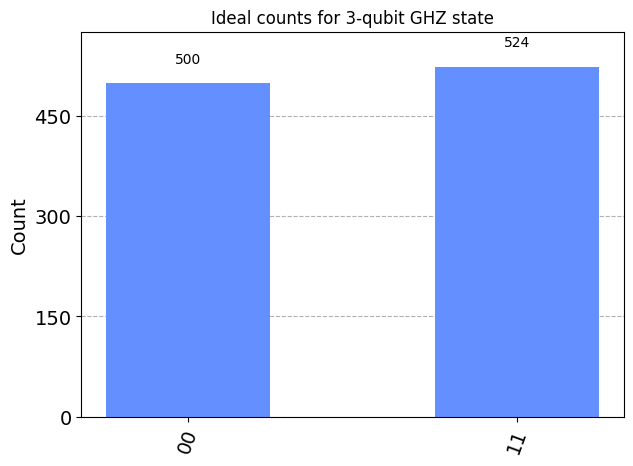

In [20]:
sim_ideal = AerSimulator()

# Execute and get counts
result = sim_ideal.run(transpile(circ, sim_ideal)).result()
counts = result.get_counts(0)
plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state')

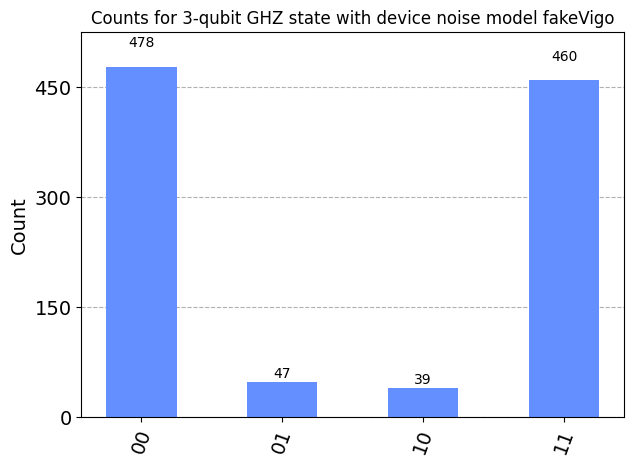

In [26]:
#We call from_backend to create a simulator for ibmq_vigo
sim_vigo = AerSimulator.from_backend(device_backend_v)
sim_toronto = AerSimulator.from_backend(device_backend_t)
sim_hanoi = AerSimulator.from_backend(device_backend_h)

# Transpile the circuit for the noisy basis gates
tcirc_v = transpile(circ, sim_vigo)
tcirc_t = transpile(circ, sim_toronto)
tcirc_h = transpile(circ, sim_hanoi)

# Execute noisy simulation and get counts
result_noise_v = sim_vigo.run(tcirc_v).result()
result_noise_t = sim_toronto.run(tcirc_t).result()
result_noise_h = sim_hanoi.run(tcirc_h).result()

counts_noise_v = result_noise_v.get_counts(0)
counts_noise_t = result_noise_t.get_counts(0)
counts_noise_h = result_noise_h.get_counts(0)

plot_histogram(counts_noise_v,
               title="Counts for 3-qubit GHZ state with device noise model fakeVigo")



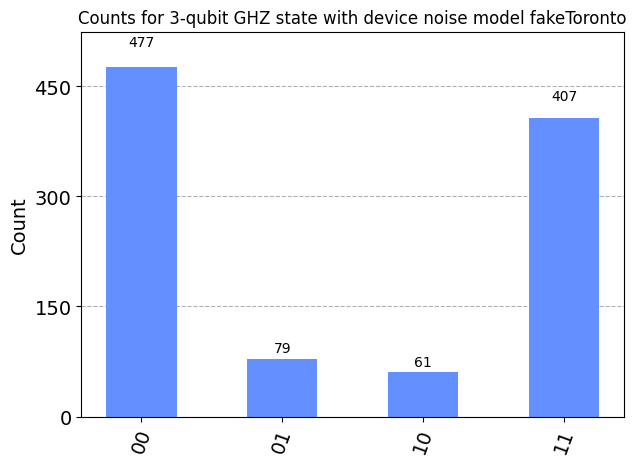

In [27]:
#plot toronto
plot_histogram(counts_noise_t,
               title="Counts for 3-qubit GHZ state with device noise model fakeToronto")

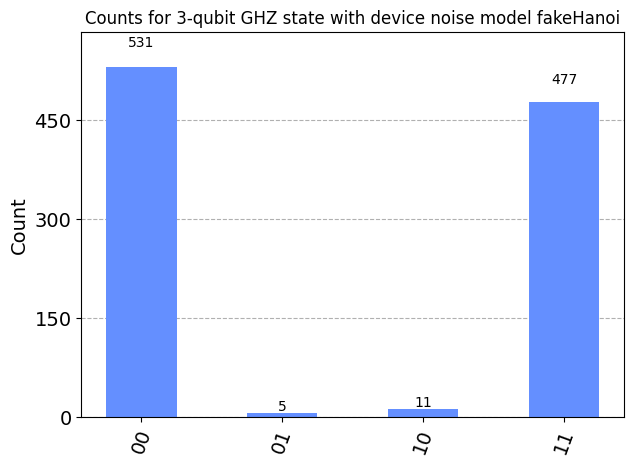

In [28]:
#plot hanoi
plot_histogram(counts_noise_h,
               title="Counts for 3-qubit GHZ state with device noise model fakeHanoi")

# **Building custum noise models**

In [ ]:
# introduce how to use the Qiskit Aer noise module to build custom noise models for noisy simulations
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)


In [ ]:
! conda install pylab

In [ ]:
import pylab

